In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import tensorflow as tf

In [3]:
import json

Dataset Source
https://www.kaggle.com/datasets/erdemtaha/cancer-data

In [17]:
data = pd.read_csv(r"cancer.csv")

In [18]:
data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [22]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [23]:
data = data[sorted(data.columns.difference(['id', 'diagnosis', 'Unnamed: 32']).to_list()) + ['diagnosis']]

In [24]:
target = 'diagnosis'

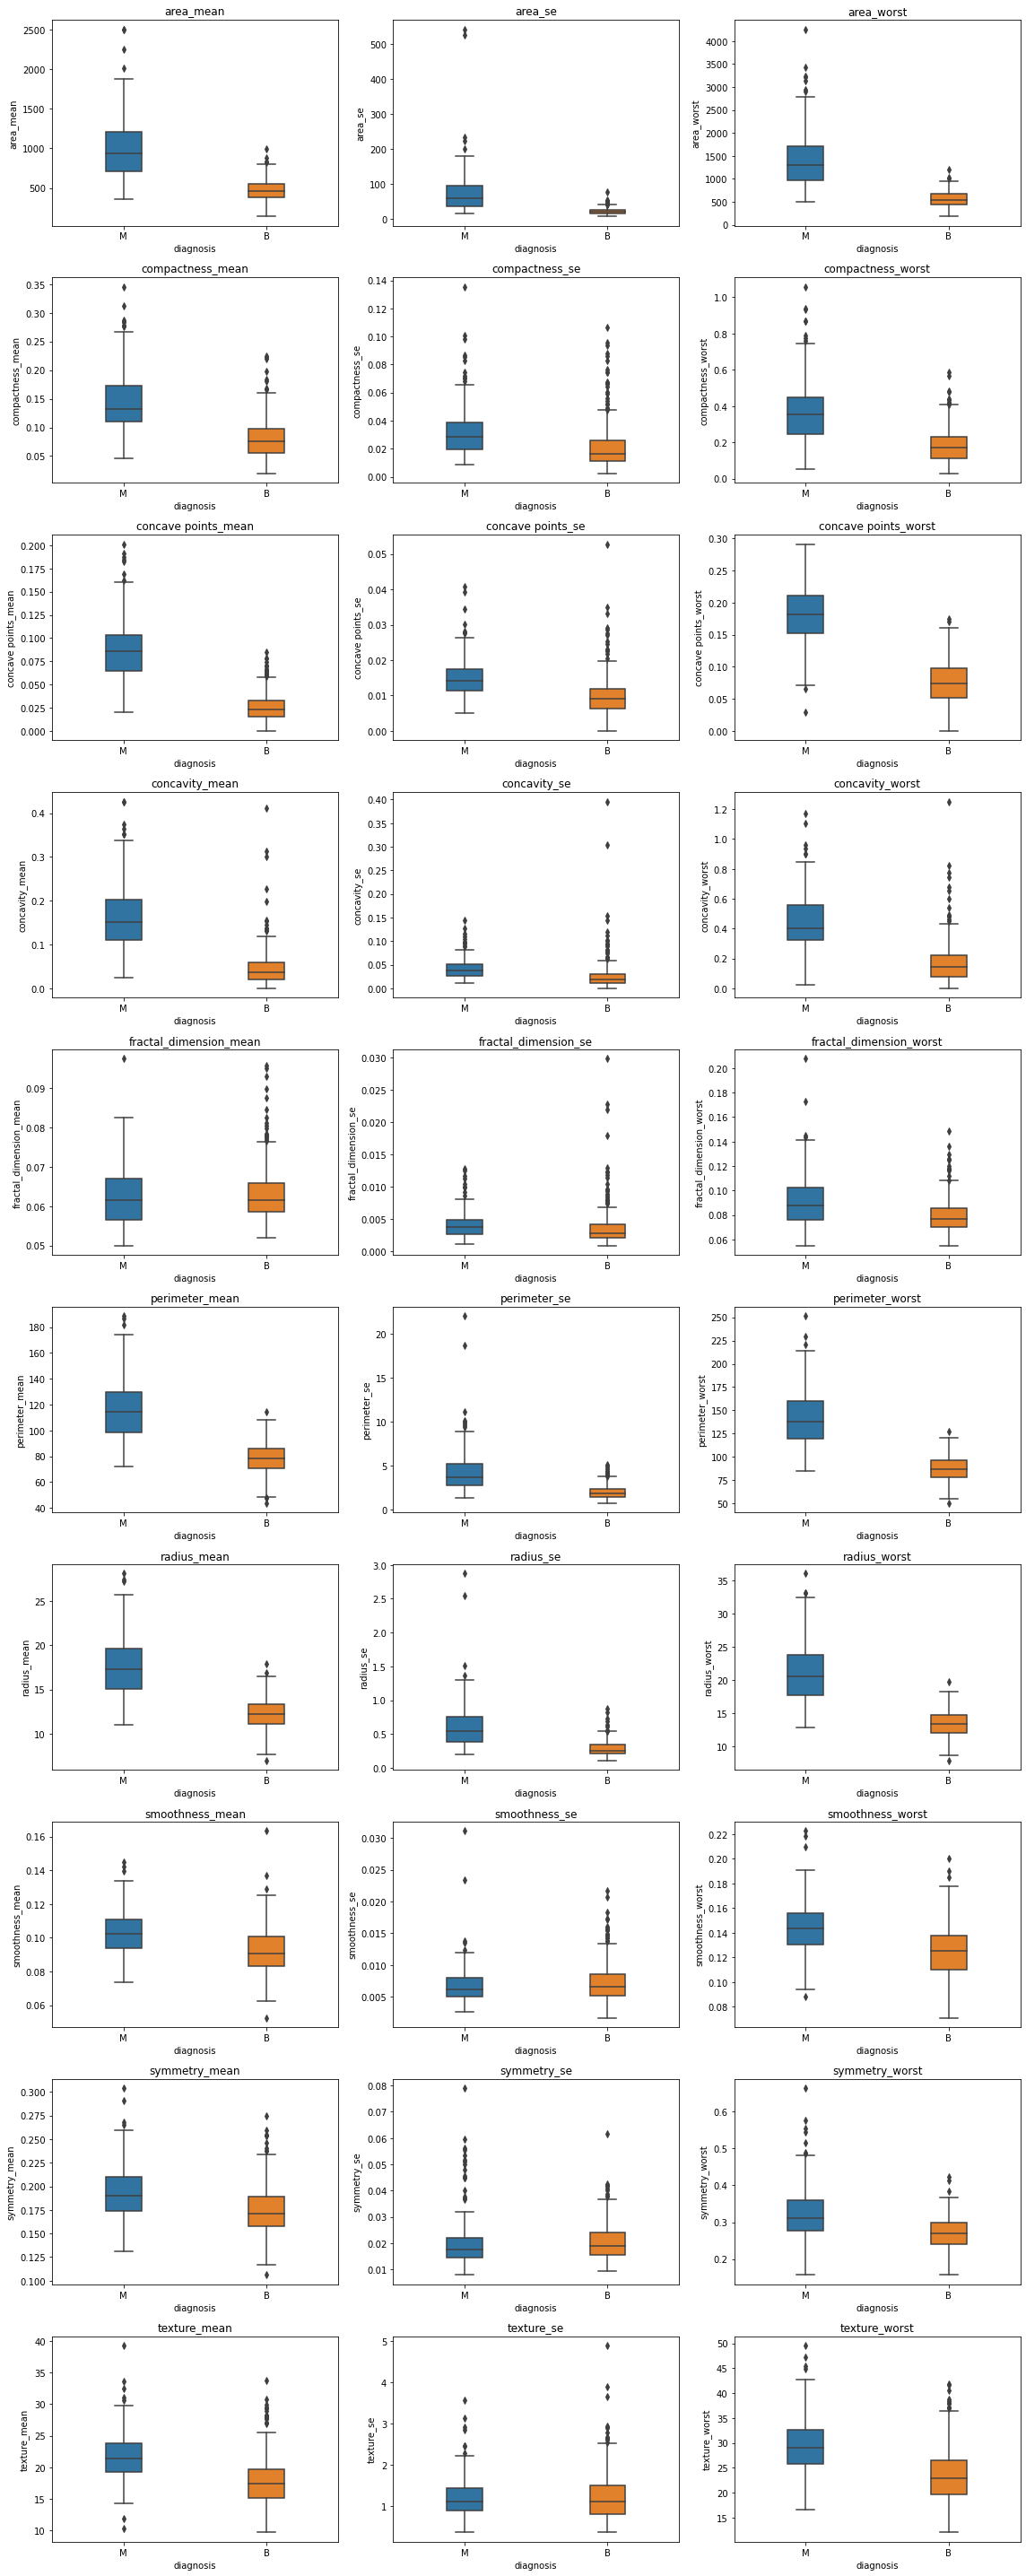

In [25]:
fig, axes = plt.subplots(
                nrows=10, 
                ncols=3, 
                figsize=(16, 40)
            )

axes = axes.flatten()

for i, feature in enumerate(data.columns[:-1]):
    sns.boxplot(data=data, x=target, y=feature, ax=axes[i], width=0.25)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [26]:
data[target] = data[target].apply(lambda r: 0 if r == 'B' else(1))

<ipython-input-26-0fb60cf75616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].apply(lambda r: 0 if r == 'B' else(1))


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data[data.columns[:-1]]
y = data[target]

_X_train, X_test, _y_train, y_test = train_test_split(X, y, train_size=0.88, random_state=1, shuffle=True, stratify=y)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', StandardScaler(), X.columns.to_list())
                    ]
                )

_X_train = preprocessor.fit_transform(_X_train)
X_test = preprocessor.transform(X_test)

In [28]:
from sklearn.metrics import make_scorer, accuracy_score

def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

error_rate_scorer = make_scorer(error_rate)

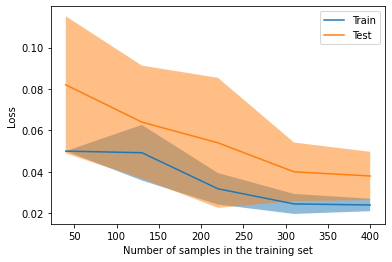

In [29]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

knn = KNeighborsClassifier()

train_sizes, train_scores, test_scores = learning_curve(knn, _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Loss"
)

display.plot()

plt.show()

In [30]:
from sklearn.model_selection import ParameterGrid, ValidationCurveDisplay, validation_curve


grid_params = ParameterGrid(
    {
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
)

grid_params = list(grid_params)

range_params = {
    'n_neighbors': np.linspace(1, 30, 30).astype(int),
    'leaf_size': np.linspace(10, 80, 8).astype(int)
}

In [31]:
validation_results = []

for gp in grid_params:
    
    print(f"Running {json.dumps(gp)}")
    
    for rp in range_params.keys():
        knn = KNeighborsClassifier(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            knn, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=error_rate_scorer,
            error_score='raise'
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

Running {"p": 1, "weights": "uniform"}
Running {"p": 1, "weights": "distance"}
Running {"p": 2, "weights": "uniform"}
Running {"p": 2, "weights": "distance"}


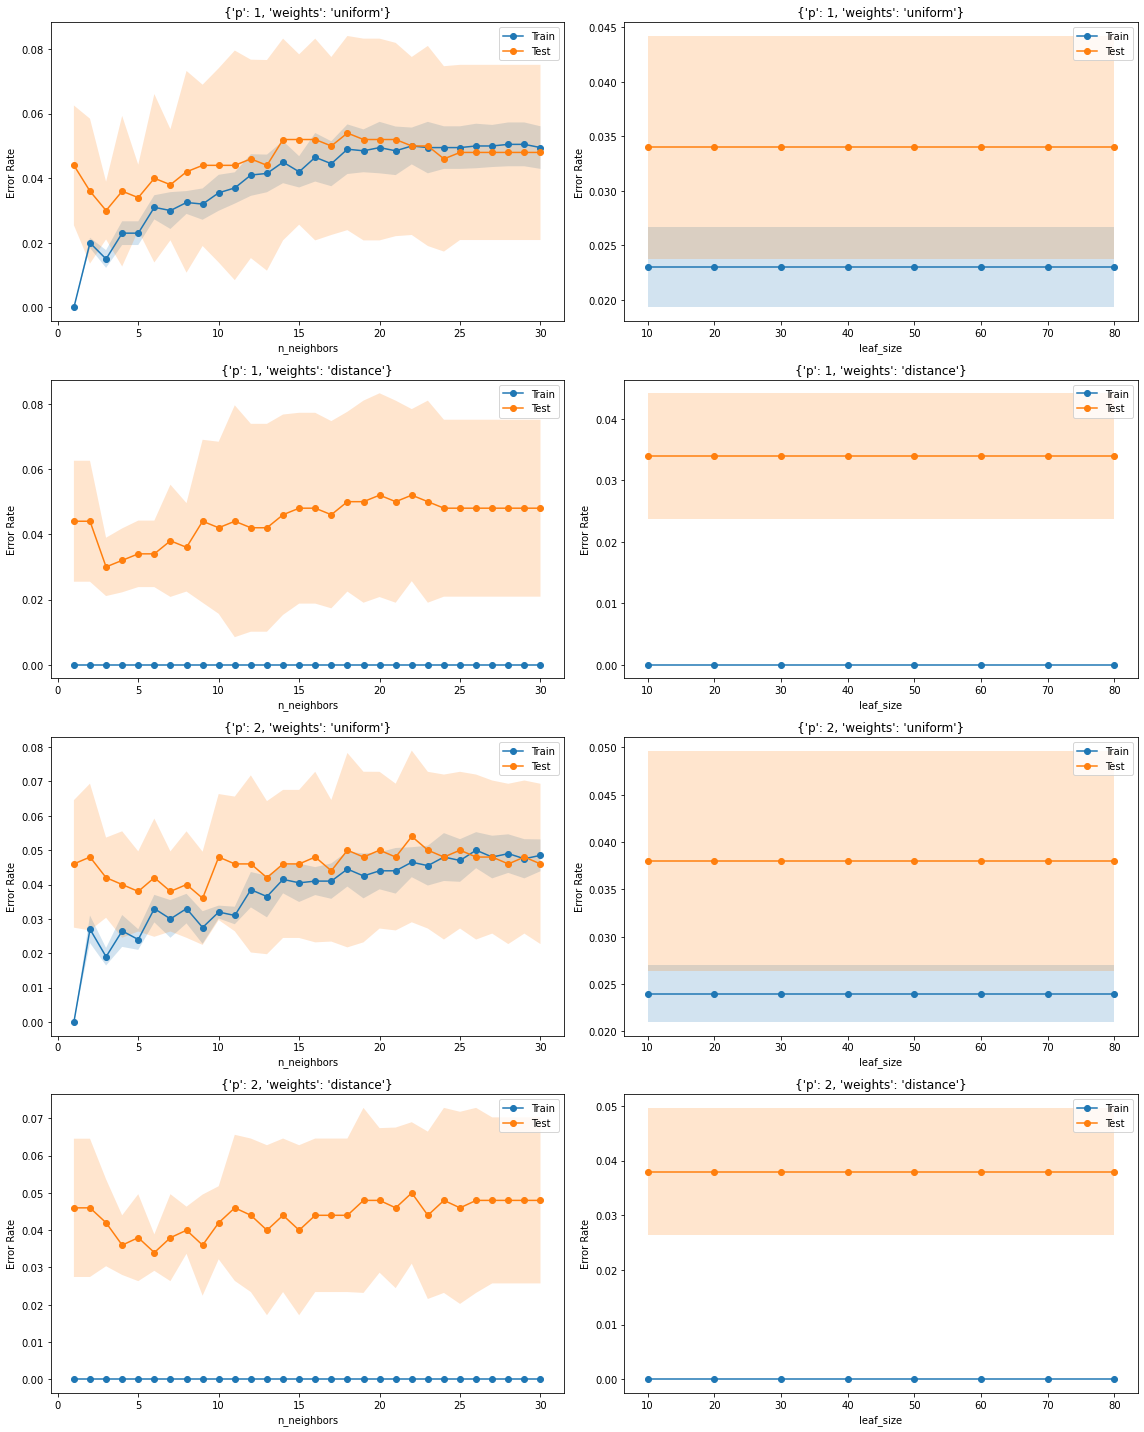

In [32]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(f"{results['gp']}")
    ax.set_xlabel(f"{results['rp']}")
    ax.set_ylabel('Error Rate')
    ax.legend()

plt.tight_layout()
plt.show()

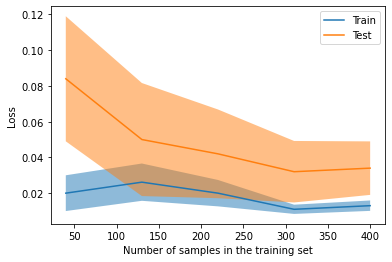

In [33]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

svc = SVC()

train_sizes, train_scores, test_scores = learning_curve(svc, _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Loss"
)

display.plot()

plt.show()

In [34]:
grid_params = list(ParameterGrid({'kernel': ['linear', 'rbf', 'sigmoid']})) + list(ParameterGrid({'kernel': ['poly'], 'degree': list(range(3, 6))}))

range_params = {
    'C': np.power(10, np.linspace(-3, 3, 7)),
    'gamma': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
}

In [35]:
grid_params

[{'kernel': 'linear'},
 {'kernel': 'rbf'},
 {'kernel': 'sigmoid'},
 {'degree': 3, 'kernel': 'poly'},
 {'degree': 4, 'kernel': 'poly'},
 {'degree': 5, 'kernel': 'poly'}]

In [36]:
validation_results = []

for gp in grid_params:
    
    for rp in range_params.keys():
        
        print(f"Running {json.dumps(gp)} - {rp}")
        
        svc = SVC(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            svc, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=error_rate_scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

Running {"kernel": "linear"} - C
Running {"kernel": "linear"} - gamma
Running {"kernel": "rbf"} - C
Running {"kernel": "rbf"} - gamma
Running {"kernel": "sigmoid"} - C
Running {"kernel": "sigmoid"} - gamma
Running {"degree": 3, "kernel": "poly"} - C
Running {"degree": 3, "kernel": "poly"} - gamma
Running {"degree": 4, "kernel": "poly"} - C
Running {"degree": 4, "kernel": "poly"} - gamma
Running {"degree": 5, "kernel": "poly"} - C
Running {"degree": 5, "kernel": "poly"} - gamma


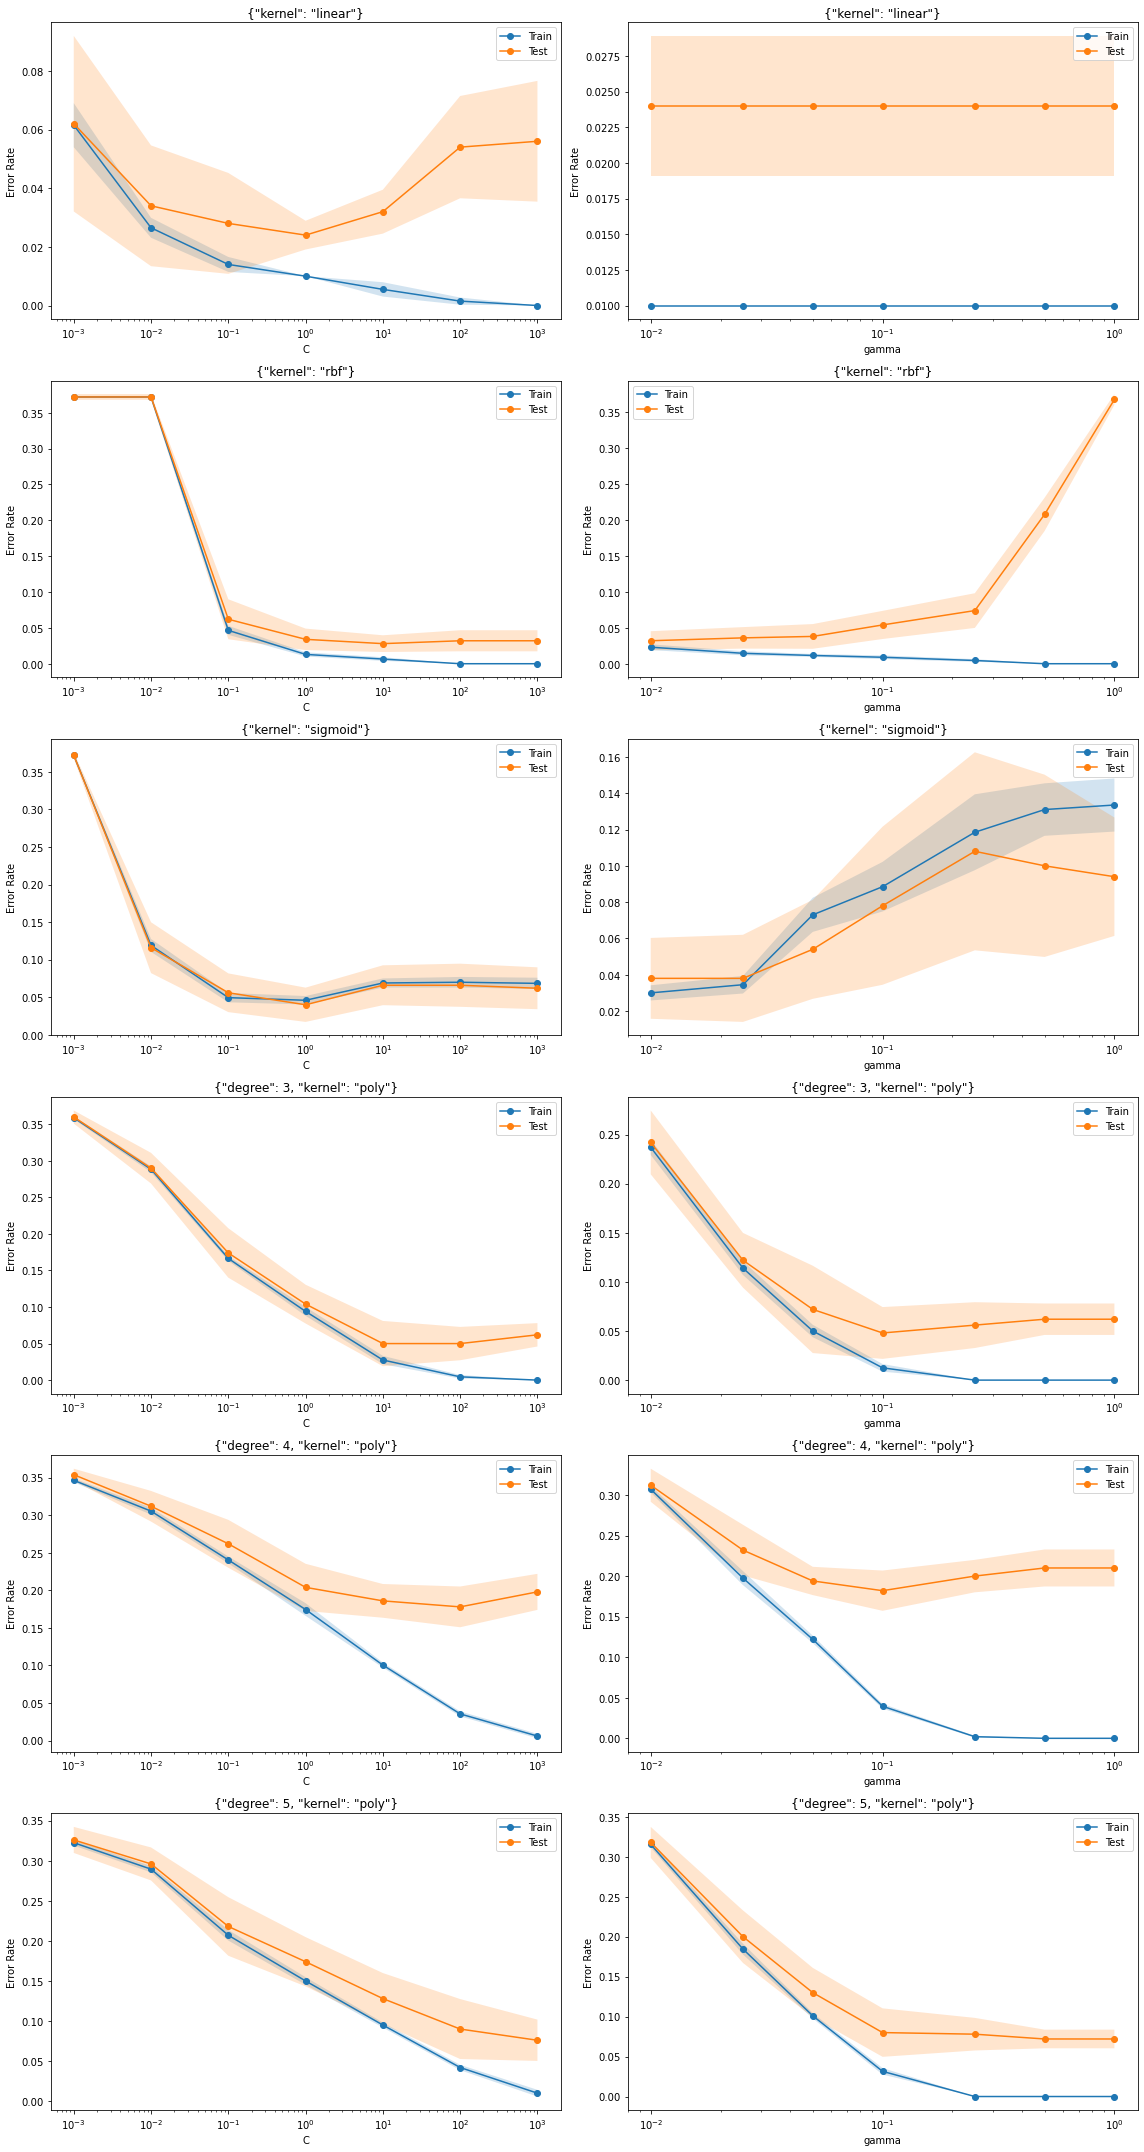

In [37]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xscale('log')
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('Error Rate')
    ax.legend()

plt.tight_layout()
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

learning_all = []

training_sizes = np.linspace(0.1, 0.9, 9)

# Perform grid search
for size in training_sizes:
    
    train_losses = []
    val_losses = []

    train_accuracies = []
    val_accuracies = []

    subset_size = int(len(_X_train) * size)
    _X_train_subset = _X_train[:subset_size]
    _y_train_subset = _y_train[:subset_size]
    
    _X_train_subset = pd.DataFrame(_X_train_subset)
    _y_train_subset = pd.DataFrame(_y_train_subset)
    
    for train_index, val_index in kf.split(_X_train_subset, _y_train_subset):
        X_train, X_val = _X_train_subset.iloc[train_index], _X_train_subset.iloc[val_index]
        y_train, y_val = _y_train_subset.iloc[train_index], _y_train_subset.iloc[val_index]

        # Create a model instance
        model = create_model()

        # Train the model
        history = model.fit(X_train, y_train, 
                            epochs=100, 
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            verbose=0)

        # Evaluate the model
        val_predictions = model.predict(X_val, verbose=0)

        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])

        train_accuracies.append(history.history['accuracy'])
        val_accuracies.append(history.history['val_accuracy'])

    
    learning_current = {
        'training_size': subset_size,
        
        'history':
            {
              'loss': {
                  'mean': np.mean(train_losses, axis=0),
                  'std': np.std(train_losses, axis=0)
              },
              'val_loss': {
                  'mean': np.mean(val_losses, axis=0),
                  'std': np.std(val_losses, axis=0)
              },
              'auc': {
                  'mean': np.mean(train_accuracies, axis=0),
                  'std': np.std(train_accuracies, axis=0)
              },
              'val_auc': {
                  'mean': np.mean(val_accuracies, axis=0),
                  'std': np.std(val_accuracies, axis=0)
              },
            }
        }

    learning_all.append(learning_current)

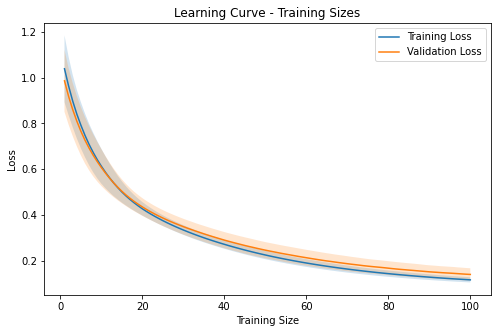

In [41]:
plt.figure(figsize=(8, 5))

plt.plot(list(range(1, 101)), learning_all[-1]['history']['loss']['mean'], label='Training Loss', )
plt.plot(list(range(1, 101)), learning_all[-1]['history']['val_loss']['mean'], label='Validation Loss', )

plt.fill_between(list(range(1, 101)), learning_all[-1]['history']['loss']['mean'] - learning_all[-1]['history']['loss']['std'], learning_all[-1]['history']['loss']['mean'] + learning_all[-1]['history']['loss']['std'], alpha=0.2)
plt.fill_between(list(range(1, 101)), learning_all[-1]['history']['val_loss']['mean'] - learning_all[-1]['history']['val_loss']['std'], learning_all[-1]['history']['val_loss']['mean'] + learning_all[-1]['history']['val_loss']['std'], alpha=0.2)

plt.title("Learning Curve - Training Sizes")
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()

plt.show()

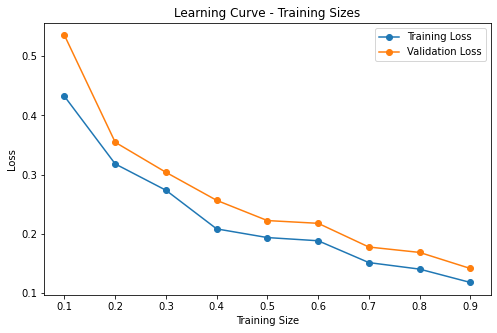

In [42]:
plt.figure(figsize=(8, 5))

plt.plot(training_sizes, [learning['history']['loss']['mean'][-1] for learning in learning_all], label='Training Loss', marker='o')
plt.plot(training_sizes, [learning['history']['val_loss']['mean'][-1] for learning in learning_all], label='Validation Loss', marker='o')

plt.title("Learning Curve - Training Sizes")
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def create_model(u1, u2, learning_rate):
    model = Sequential([
        Dense(u1, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(u2, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# hyperparameter ranges
units1 = [32, 16]
units2 = [16, 8]
epoch_list = [50, 100]
batch_size_list = [32, 64]
learning_rate_list = [0.001, 0.01]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

performance_all = []

_X_train = pd.DataFrame(_X_train)
# _y_train = pd.DataFrame(_y_train)

# search
for u1 in units1:
    for u2 in units2:
        for epochs in epoch_list:
            for batch_size in batch_size_list:
                for learning_rate in learning_rate_list:
                    
                    print(f"u1:{u1}, u2:{u2}, epochs:{epochs}, batch_size:{batch_size}, learning_rate:{learning_rate}")
                    
                    train_losses = []
                    val_losses = []
                    
                    train_accuracies = []
                    val_accuracies = []
                    
                    for train_index, val_index in kf.split(_X_train, _y_train):
                        X_train, X_val = _X_train.iloc[train_index], _X_train.iloc[val_index]
                        y_train, y_val = pd.DataFrame(_y_train).iloc[train_index], pd.DataFrame(_y_train).iloc[val_index]

                        # Create a model instance
                        model = create_model(u1, u2, learning_rate)

                        # Train the model
                        history = model.fit(X_train, y_train, 
                                            epochs=epochs, 
                                            batch_size=batch_size,
                                            validation_data=(X_val, y_val),
                                            verbose=0)

                        # Evaluate the model
                        val_predictions = model.predict(X_val, verbose=0)
                        
                        train_losses.append(history.history['loss'])
                        val_losses.append(history.history['val_loss'])

                        train_accuracies.append(history.history['accuracy'])
                        val_accuracies.append(history.history['val_accuracy'])
                        
                    performace_current = {'params':
                                          {
                                              'u1': u1,
                                              'u2': u2,
                                              'epochs': epochs,
                                              'batch_size': batch_size,
                                              'learning_rate': learning_rate,
                                          },
                                          
                                          'history':
                                          {
                                              'loss': {
                                                  'mean': np.mean(train_losses, axis=0),
                                                  'std': np.std(train_losses, axis=0)
                                              },
                                              'val_loss': {
                                                  'mean': np.mean(val_losses, axis=0),
                                                  'std': np.std(val_losses, axis=0)
                                              },
                                              'accuracy': {
                                                  'mean': np.mean(train_accuracies, axis=0),
                                                  'std': np.std(train_accuracies, axis=0)
                                              },
                                              'val_accuracy': {
                                                  'mean': np.mean(val_accuracies, axis=0),
                                                  'std': np.std(val_accuracies, axis=0)
                                              },
                                          }
                                         }
                        
                    performance_all.append(performace_current)

u1:32, u2:16, epochs:50, batch_size:32, learning_rate:0.001
u1:32, u2:16, epochs:50, batch_size:32, learning_rate:0.01
u1:32, u2:16, epochs:50, batch_size:64, learning_rate:0.001
u1:32, u2:16, epochs:50, batch_size:64, learning_rate:0.01
u1:32, u2:16, epochs:100, batch_size:32, learning_rate:0.001
u1:32, u2:16, epochs:100, batch_size:32, learning_rate:0.01
u1:32, u2:16, epochs:100, batch_size:64, learning_rate:0.001
u1:32, u2:16, epochs:100, batch_size:64, learning_rate:0.01
u1:32, u2:8, epochs:50, batch_size:32, learning_rate:0.001
u1:32, u2:8, epochs:50, batch_size:32, learning_rate:0.01
u1:32, u2:8, epochs:50, batch_size:64, learning_rate:0.001
u1:32, u2:8, epochs:50, batch_size:64, learning_rate:0.01
u1:32, u2:8, epochs:100, batch_size:32, learning_rate:0.001
u1:32, u2:8, epochs:100, batch_size:32, learning_rate:0.01
u1:32, u2:8, epochs:100, batch_size:64, learning_rate:0.001
u1:32, u2:8, epochs:100, batch_size:64, learning_rate:0.01
u1:16, u2:16, epochs:50, batch_size:32, learning

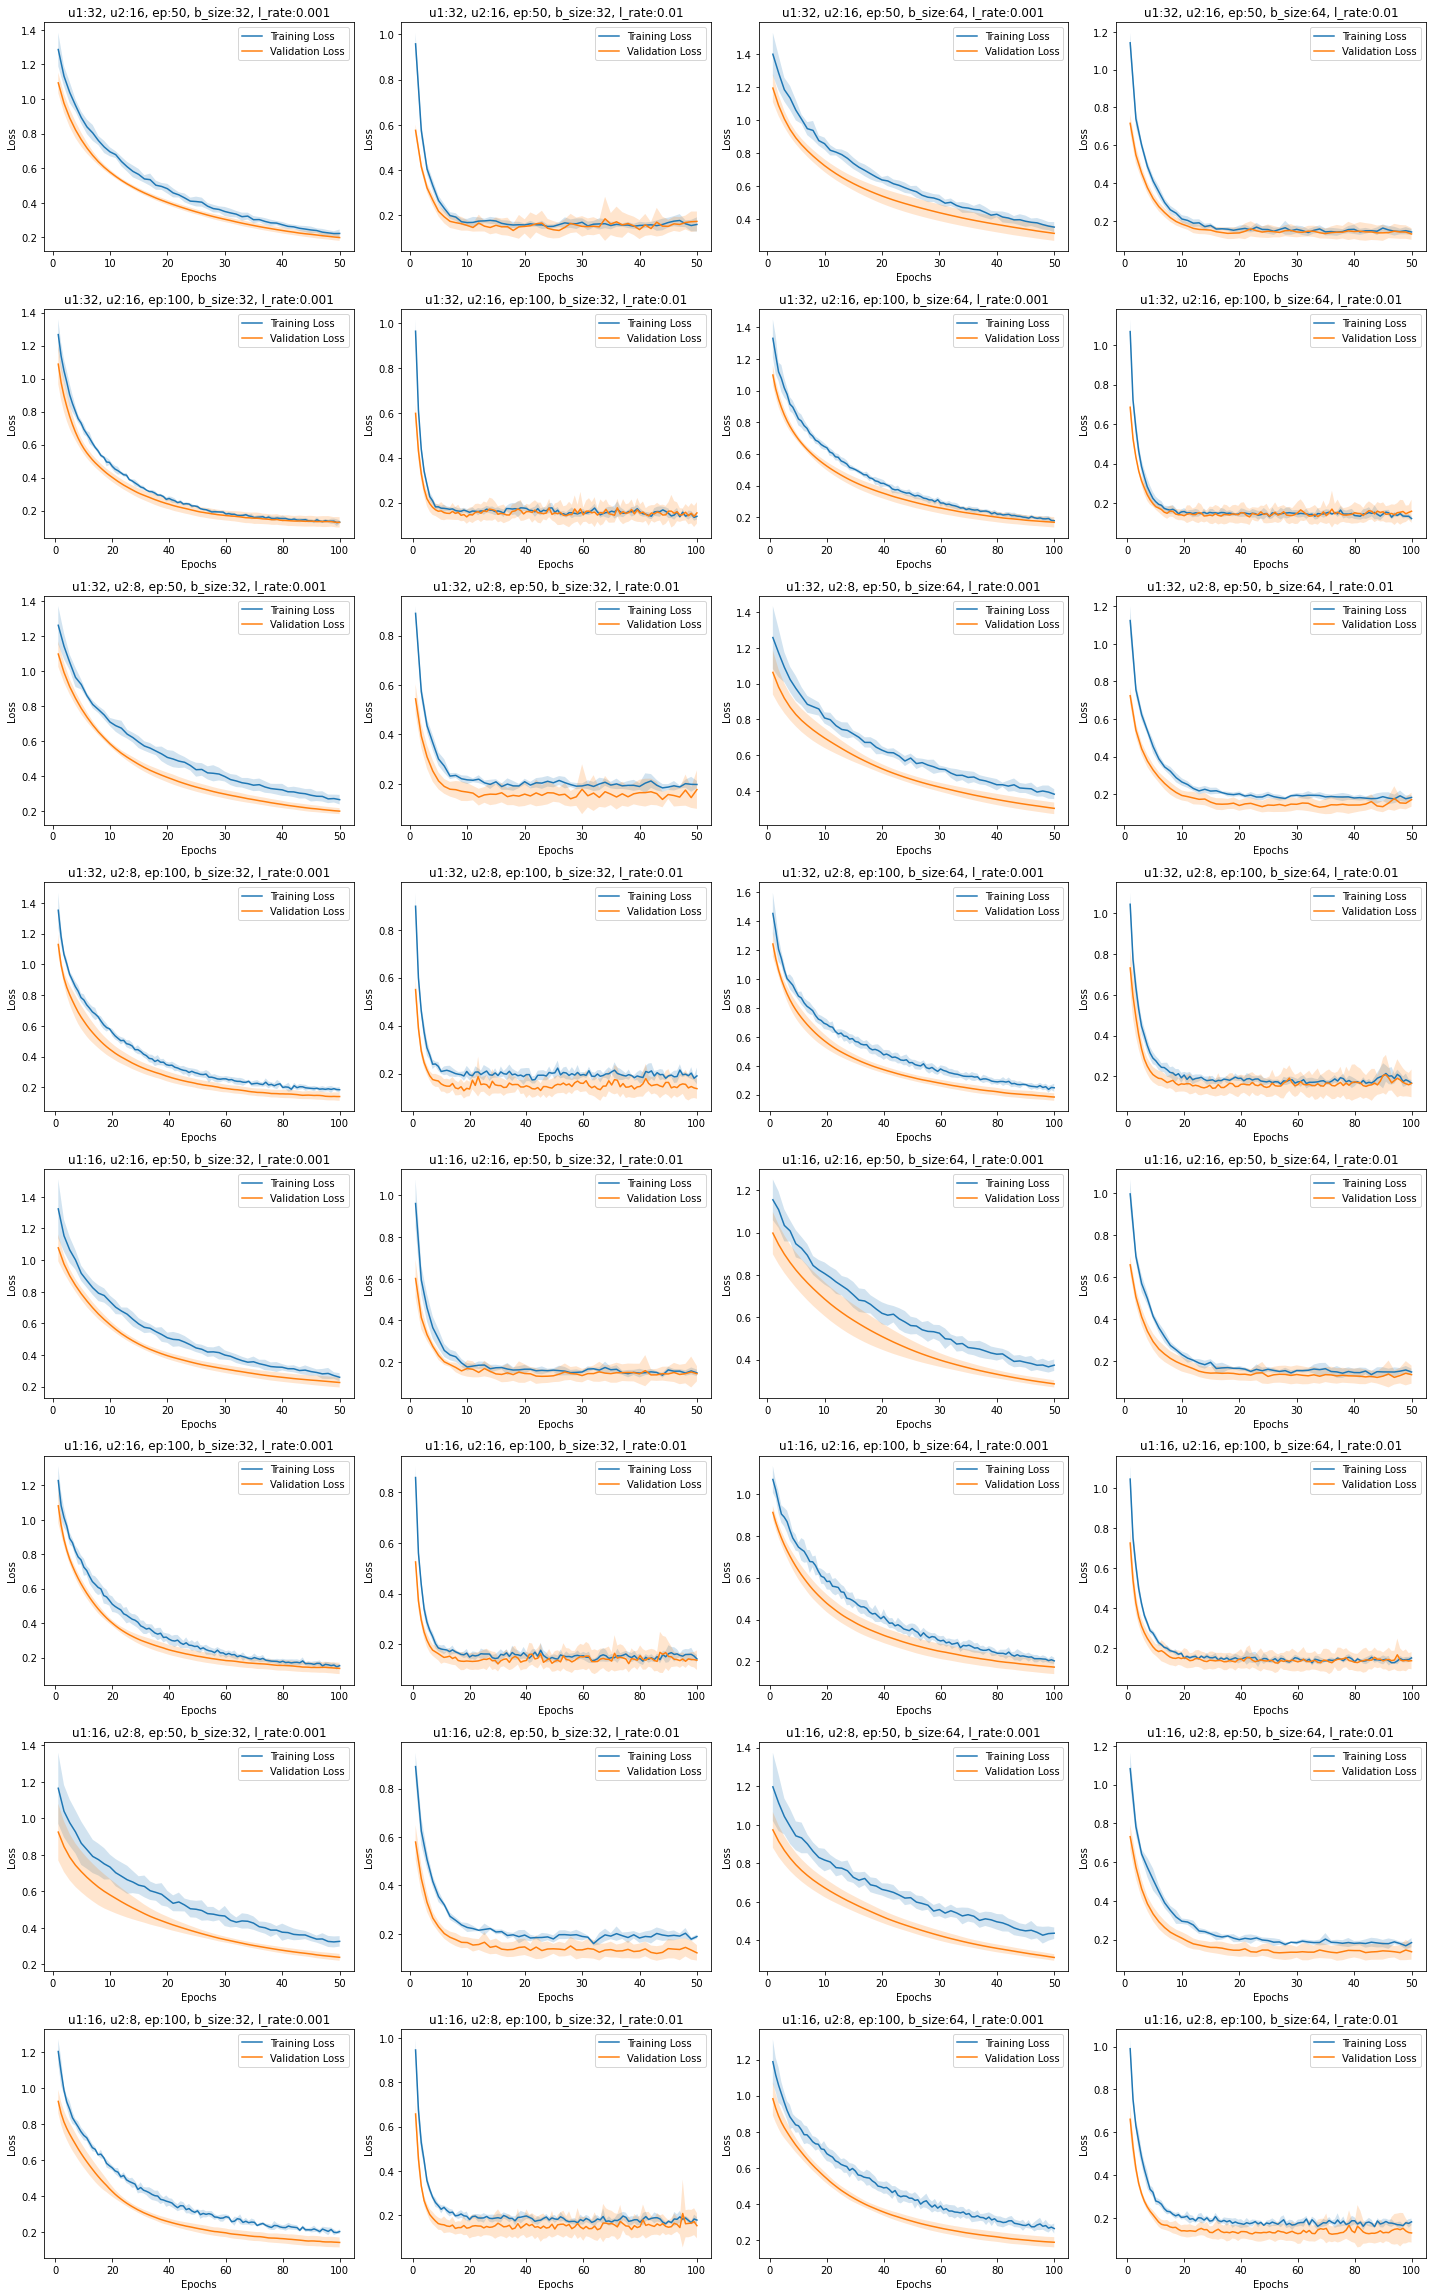

In [44]:
# Plot training & validation loss values
fig, axes = plt.subplots(int(len(performance_all)/4), 4, figsize=(20, int(len(performance_all)/4)*4))

axes = axes.flatten()

for ax, (i, performance) in zip(axes, enumerate(performance_all)):
    
    n = performance['params']['epochs']
    
    ax.plot(list(range(1, n+1)), performance['history']['loss']['mean'], label='Training Loss', )
    ax.plot(list(range(1, n+1)), performance['history']['val_loss']['mean'], label='Validation Loss', )
    
    ax.fill_between(list(range(1, n+1)), performance['history']['loss']['mean'] - performance['history']['loss']['std'], performance['history']['loss']['mean'] + performance['history']['loss']['std'], alpha=0.2)
    ax.fill_between(list(range(1, n+1)), performance['history']['val_loss']['mean'] - performance['history']['val_loss']['std'], performance['history']['val_loss']['mean'] + performance['history']['val_loss']['std'], alpha=0.2)
    
    ax.set_title(f"u1:{performance['params']['u1']}, u2:{performance['params']['u2']}, ep:{performance['params']['epochs']}, b_size:{performance['params']['batch_size']}, l_rate:{performance['params']['learning_rate']}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()
plt.show()

In [45]:
pt_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'][-1],
        'val_loss': p['history']['val_loss']['mean'][-1],
        'accuracy': p['history']['accuracy']['mean'][-1],
        'val_accuracy': p['history']['val_accuracy']['mean'][-1],
    }, 
    performance_all
)))

pt_results_df.loc[
    list(set(pt_results_df.sort_values(['val_loss', 'val_accuracy'], ascending=[True, False]).head(10).index).intersection(
        set(pt_results_df.sort_values(['val_accuracy', 'val_loss'], ascending=[False, True]).head(10).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,accuracy,val_accuracy
3,32,16,50,64,0.010,0.141577,0.131205,0.9755,0.978
20,16,16,100,32,0.001,0.152972,0.137243,0.9755,0.974
21,16,16,100,32,0.010,0.142210,0.137114,0.9735,0.976
23,16,16,100,64,0.010,0.149768,0.135916,0.9700,0.974
25,16,8,50,32,0.010,0.189038,0.121826,0.9560,0.974


In [46]:
pt_best_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'].min(),
        'val_loss': p['history']['val_loss']['mean'].min(),
        'accuracy': p['history']['accuracy']['mean'].max(),
        'val_accuracy': p['history']['val_accuracy']['mean'].max(),
    }, 
    performance_all
)))

pt_best_results_df.loc[
    list(set(pt_best_results_df.sort_values(['val_loss', 'val_accuracy'], ascending=[True, False]).head(10).index).intersection(
        set(pt_best_results_df.sort_values(['val_accuracy', 'val_loss'], ascending=[False, True]).head(10).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,accuracy,val_accuracy
13,32,8,100,32,0.01,0.173424,0.128316,0.9665,0.982
17,16,16,50,32,0.01,0.136042,0.130640,0.9780,0.984
19,16,16,50,64,0.01,0.137943,0.124496,0.9785,0.982
23,16,16,100,64,0.01,0.124852,0.123943,0.9815,0.982
31,16,8,100,64,0.01,0.158936,0.123387,0.9660,0.982


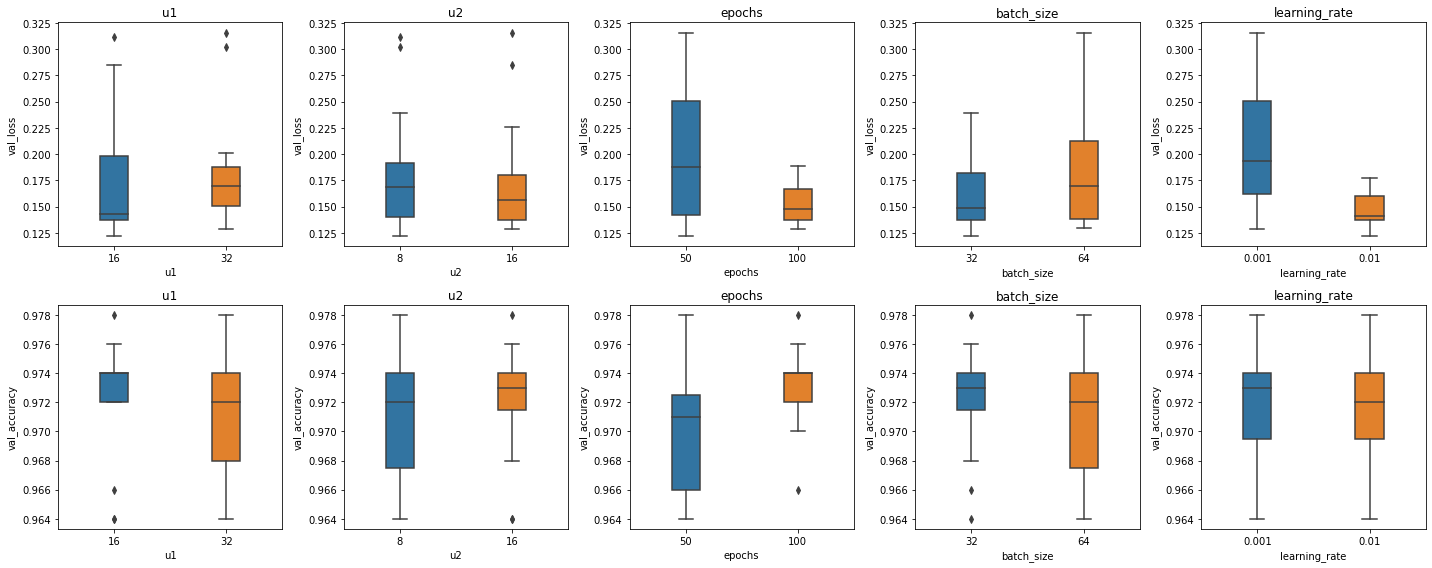

In [47]:
fig, axes = plt.subplots(
                nrows=2, 
                ncols=5, 
                figsize=(20, 8)
            )

axes = axes.flatten()

for i, metric in enumerate(['val_loss', 'val_accuracy']):
    for j, col in enumerate(pt_results_df.columns[:5]):
        sns.boxplot(data=pt_results_df, x=col, y=metric, ax=axes[(i*5)+j], width=0.25)
        axes[(i*5)+j].set_title(col)

plt.tight_layout()
plt.show()

### AUC

In [48]:
from sklearn.metrics import make_scorer, roc_auc_score

In [49]:
grid_params = ParameterGrid(
    {
        'weights': ['distance'],
        'p': [1, 2],
    }
)

grid_params = list(grid_params)

range_params = {
    'n_neighbors': list(range(3, 50))
}

In [50]:
grid_params

[{'p': 1, 'weights': 'distance'}, {'p': 2, 'weights': 'distance'}]

In [51]:
scorer = make_scorer(roc_auc_score)

validation_results = []

for gp in grid_params:
    for rp in range_params.keys():
        knn = KNeighborsClassifier(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            knn, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

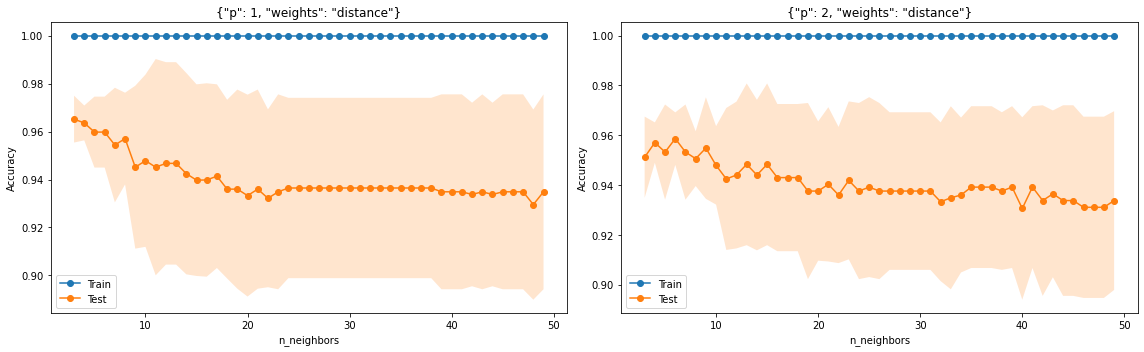

In [52]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()

In [53]:
grid_params = list(ParameterGrid({'kernel': ['rbf', 'poly']})) # + list(ParameterGrid({'kernel': ['poly'], 'degree': [3]}))

range_params = {
    'C': np.power(10, np.linspace(-3, 3, 7)),
    'gamma': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
}

validation_results = []

In [54]:
grid_params

[{'kernel': 'rbf'}, {'kernel': 'poly'}]

In [55]:
for gp in grid_params:
    for rp in range_params.keys():
        svc = SVC(**gp)

        param_name, param_range = rp, range_params.get(rp)
        train_scores, test_scores = validation_curve(
            svc, 
            _X_train, 
            _y_train,
            param_name=param_name,
            param_range=param_range,
            scoring=scorer
        )
        
        # Calculate mean and standard deviation of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        validation_results.append(
            {
                'gp': gp,
                'rp': rp,
                'param_range': param_range,
                'train_scores_mean': train_scores_mean,
                'train_scores_std': train_scores_std,
                'test_scores_mean': test_scores_mean,
                'test_scores_std': test_scores_std
            }
        )

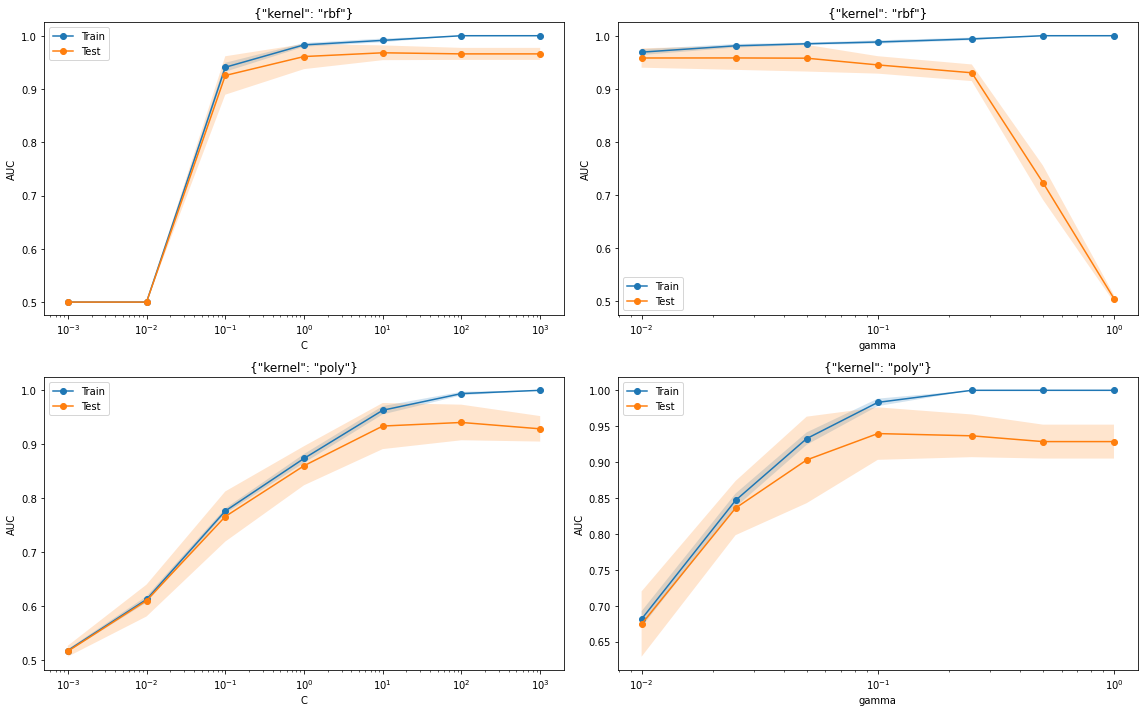

In [56]:
fig, axes = plt.subplots(int(len(validation_results)/2), 2, figsize=(16, int(len(validation_results)/2)*5))

axes = axes.flatten()

for ax, (i, results) in zip(axes, enumerate(validation_results)):
    param_range = results['param_range']
    train_scores_mean = results['train_scores_mean']
    train_scores_std = results['train_scores_std']
    test_scores_mean = results['test_scores_mean']
    test_scores_std = results['test_scores_std']
    
    ax.plot(param_range, train_scores_mean, label='Train', marker='o')
    ax.plot(param_range, test_scores_mean, label='Test', marker='o')
    
    ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
    ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
    
    ax.set_title(json.dumps(results['gp']))
    ax.set_xscale('log')
    ax.set_xlabel(results['rp'])
    ax.set_ylabel('AUC')
    ax.legend()

plt.tight_layout()
plt.show()

In [57]:
def create_model(u1, u2, learning_rate):
    model = Sequential([
        Dense(u1, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(u2, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['AUC'])
    
    return model

# Define hyperparameter ranges
param_combos = [
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 16, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.001},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.01},
    {'u1': 16, 'u2': 8, 'epochs': 100, 'batch_size': 64, 'learning_rate': 0.001},
]

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_performance_all = []

# Perform grid search
for params in param_combos:

    print(f"{json.dumps(params)}")

    train_losses = []
    val_losses = []

    train_aucs = []
    val_aucs = []

    for train_index, val_index in kf.split(_X_train, _y_train):
        X_train, X_val = _X_train.iloc[train_index], _X_train.iloc[val_index]
        y_train, y_val = pd.DataFrame(_y_train).iloc[train_index], pd.DataFrame(_y_train).iloc[val_index]

        # Create a model instance
        model = create_model(params['u1'], params['u2'], params['learning_rate'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train, y_train, 
                            epochs=params['epochs'], 
                            batch_size=params['batch_size'],
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping],
                            verbose=0)

        # Evaluate the model
        val_predictions = model.predict(X_val, verbose=0)

        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])

        train_aucs.append(history.history['auc'])
        val_aucs.append(history.history['val_auc'])
        
    train_losses = [arr + [arr[-1]]*(len(max(train_losses, key=len)) - len(arr)) for arr in train_losses]
    
    val_losses = [arr + [arr[-1]]*(len(max(val_losses, key=len)) - len(arr)) for arr in val_losses]
    
    train_aucs = [arr + [arr[-1]]*(len(max(train_aucs, key=len)) - len(arr)) for arr in train_aucs]
    
    val_aucs = [arr + [arr[-1]]*(len(max(val_aucs, key=len)) - len(arr)) for arr in val_aucs]
    
    performace_current = {
        'params': params,

        'history':
            {
              'loss': {
                  'mean': np.mean(train_losses, axis=0),
                  'std': np.std(train_losses, axis=0)
              },
              'val_loss': {
                  'mean': np.mean(val_losses, axis=0),
                  'std': np.std(val_losses, axis=0)
              },
              'auc': {
                  'mean': np.mean(train_aucs, axis=0),
                  'std': np.std(train_aucs, axis=0)
              },
              'val_auc': {
                  'mean': np.mean(val_aucs, axis=0),
                  'std': np.std(val_aucs, axis=0)
              },
            }
        }

    auc_performance_all.append(performace_current)

{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 32, "learning_rate": 0.01}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 32, "learning_rate": 0.001}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 64, "learning_rate": 0.01}
{"u1": 16, "u2": 16, "epochs": 100, "batch_size": 64, "learning_rate": 0.001}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 32, "learning_rate": 0.01}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 32, "learning_rate": 0.001}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 64, "learning_rate": 0.01}
{"u1": 16, "u2": 8, "epochs": 100, "batch_size": 64, "learning_rate": 0.001}


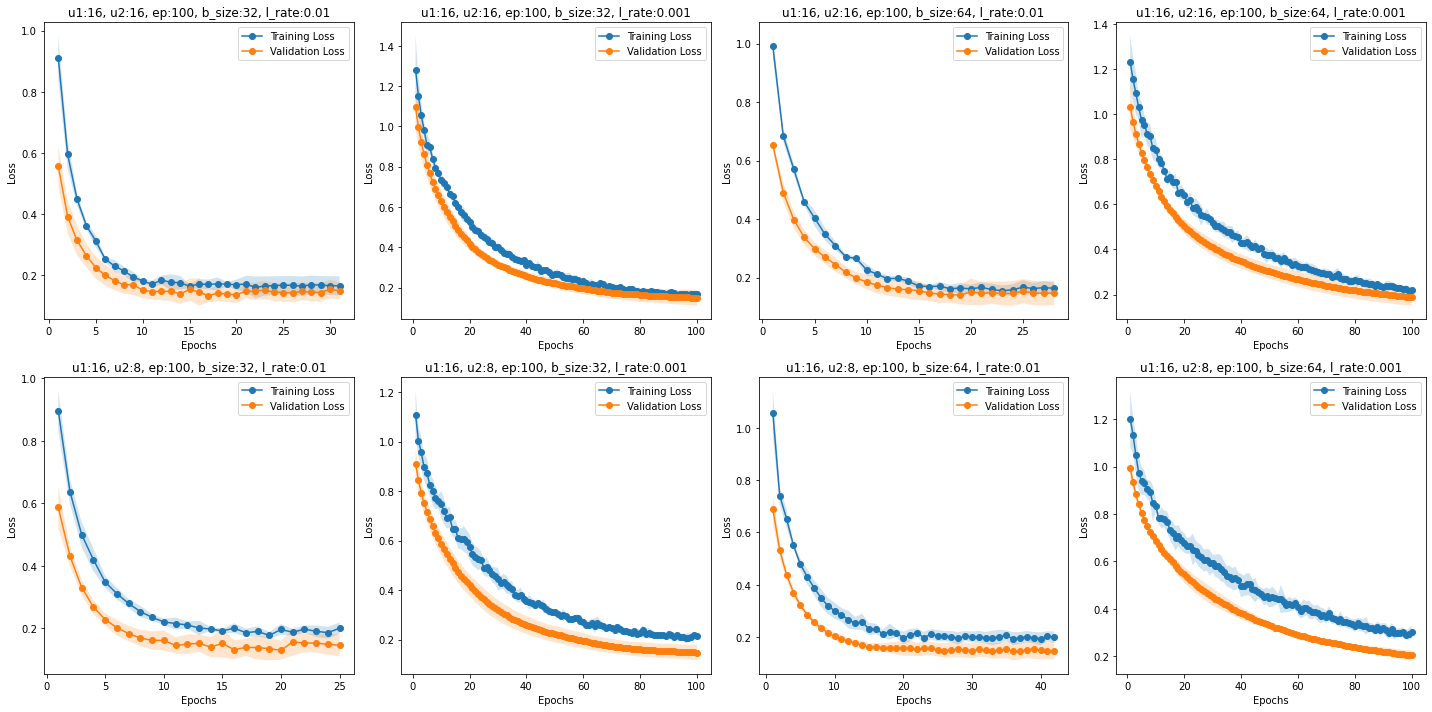

In [58]:
# Plot training & validation loss values
fig, axes = plt.subplots(int(len(auc_performance_all)/4), 4, figsize=(20, int(len(auc_performance_all)/4)*5))

axes = axes.flatten()

for ax, (i, performance) in zip(axes, enumerate(auc_performance_all)):
    
    n = len(performance['history']['loss']['mean'])
    
    ax.plot(list(range(1, n+1)), performance['history']['loss']['mean'], label='Training Loss', marker='o')
    ax.plot(list(range(1, n+1)), performance['history']['val_loss']['mean'], label='Validation Loss', marker='o')
    
    ax.fill_between(list(range(1, n+1)), performance['history']['loss']['mean'] - performance['history']['loss']['std'], performance['history']['loss']['mean'] + performance['history']['loss']['std'], alpha=0.2)
    ax.fill_between(list(range(1, n+1)), performance['history']['val_loss']['mean'] - performance['history']['val_loss']['std'], performance['history']['val_loss']['mean'] + performance['history']['val_loss']['std'], alpha=0.2)
    
    ax.set_title(f"u1:{performance['params']['u1']}, u2:{performance['params']['u2']}, ep:{performance['params']['epochs']}, b_size:{performance['params']['batch_size']}, l_rate:{performance['params']['learning_rate']}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()
plt.show()

In [59]:
auc_pt_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'][-1],
        'val_loss': p['history']['val_loss']['mean'][-1],
        'auc': p['history']['auc']['mean'][-1],
        'val_auc': p['history']['val_auc']['mean'][-1],
    }, 
    auc_performance_all
)))

auc_pt_results_df.loc[
    list(set(auc_pt_results_df.sort_values(['val_loss', 'val_auc'], ascending=[True, False]).head(3).index).intersection(
        set(auc_pt_results_df.sort_values(['val_auc', 'val_loss'], ascending=[False, True]).head(3).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,auc,val_auc
4,16,8,100,32,0.010,0.200761,0.145695,0.984195,0.993879
5,16,8,100,32,0.001,0.214867,0.147399,0.986963,0.994777


In [60]:
auc_pt_best_results_df = pd.DataFrame(list(map(
    lambda p: 
    {
        'u1': p['params']['u1'],
        'u2': p['params']['u2'],
        'epochs': p['params']['epochs'],
        'batch_size': p['params']['batch_size'],
        'learning_rate': p['params']['learning_rate'],
        'loss': p['history']['loss']['mean'].min(),
        'val_loss': p['history']['val_loss']['mean'].min(),
        'auc': p['history']['auc']['mean'].max(),
        'val_auc': p['history']['val_auc']['mean'].max(),
    }, 
    auc_performance_all
)))

auc_pt_best_results_df.loc[
    list(set(auc_pt_best_results_df.sort_values(['val_loss', 'val_auc'], ascending=[True, False]).head(3).index).intersection(
        set(auc_pt_best_results_df.sort_values(['val_auc', 'val_loss'], ascending=[False, True]).head(3).index)
    ))
]

,u1,u2,epochs,batch_size,learning_rate,loss,val_loss,auc,val_auc
0,16,16,100,32,0.01,0.160407,0.133387,0.993622,0.995895


In [64]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', p=2)
knn.fit(_X_train, _y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [65]:
svc = SVC(kernel='rbf', C=10, gamma=0.25)
svc.fit(_X_train, _y_train)

SVC(C=10, gamma=0.25)

In [66]:
import time

from tensorflow.keras.callbacks import Callback

class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)

nnet = Sequential([
    Dense(16, activation='relu', input_shape=(_X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nnet.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['AUC'])

time_callback = TimeHistory()
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = nnet.fit(_X_train, _y_train,
                   epochs=100,
                   batch_size=32,
                   callbacks=[time_callback, early_stopping],
                   verbose=0)

times = time_callback.times

In [67]:
predictions = {
    'knn': knn.predict(X_test),
    'svc': svc.predict(X_test),
    'nnet': np.round(nnet.predict(X_test, verbose=0)).astype(int).flatten()
}

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn


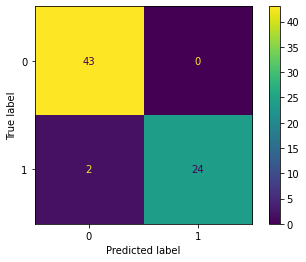

svc


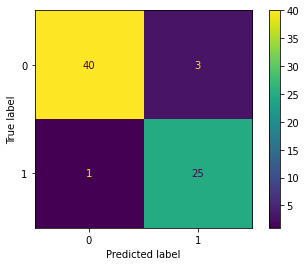

nnet


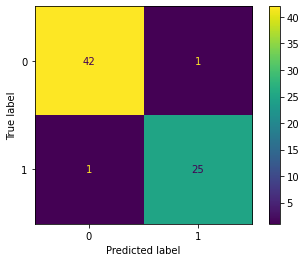

In [69]:
for clf in  predictions.keys():
    print(clf)
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions[clf], labels=np.array([0, 1])),
                           display_labels=np.array([0, 1])
                          ).plot()

    plt.show()

In [70]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [71]:
pd.DataFrame(
    [
        {
            'accuracy_score': accuracy_score(y_test, predictions[clf]),
            'roc_auc_score': roc_auc_score(y_test, predictions[clf]),
            'f1_score': f1_score(y_test, predictions[clf]),
            'precision_score': precision_score(y_test, predictions[clf]),
            'recall_score': recall_score(y_test, predictions[clf])
        }
        
        for clf in predictions.keys()
    ],
    index=list(predictions.keys())
) # .style.highlight_max(color='lightgreen', axis=0)

,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score
knn,0.971014,0.961538,0.960000,1.000000,0.923077
svc,0.942029,0.945886,0.925926,0.892857,0.961538
nnet,0.971014,0.969141,0.961538,0.961538,0.961538


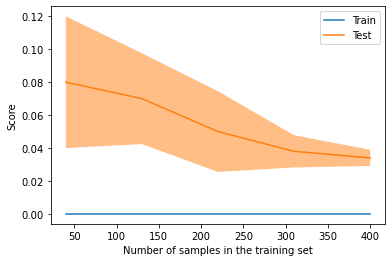

In [74]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(**knn.get_params()), _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Score"
)

display.plot()

plt.show()

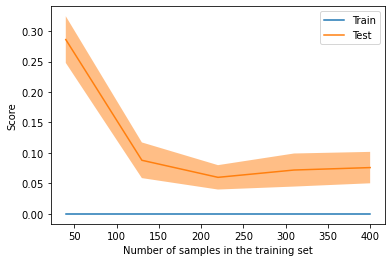

In [75]:
train_sizes, train_scores, test_scores = learning_curve(SVC(**svc.get_params()), _X_train, _y_train, cv=5, scoring=error_rate_scorer)

display = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores, 
    test_scores=test_scores, 
    score_name="Score"
)

display.plot()

plt.show()

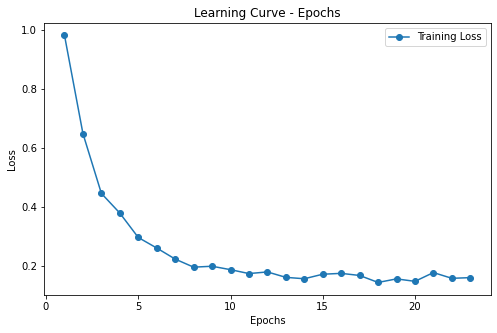

In [76]:
plt.figure(figsize=(8, 5))

plt.plot(list(range(1, len(history.history['loss'])+1)), history.history['loss'], label='Training Loss', marker='o')

plt.title("Learning Curve - Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()